# HW1 18739 Security and Fairness of Deep learning
## Name:

# 3 Before You Start

##  3.2 Loading in the data 

In [ ]:
#Note: You don't have to use the starter code
import gzip
import pickle as pkl
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras import optimizers
import time
def load_data(path):
    f = gzip.open(path, 'rb')
    try:
        #Python3
        train_set, valid_set, test_set = pkl.load(f, encoding='latin1')
    except:
        #Python2
        train_set, valid_set, test_set = pkl.load(f)
    f.close()
    return(train_set,valid_set,test_set)

Using TensorFlow backend.


In [9]:
#Loading in the data
path = 'mnist.pkl.gz' 
train_set,valid_set,test_set = load_data(path)
print(test_set[0].shape)

##preprocess the data
y_train = np_utils.to_categorical(train_set[1], 10)
y_val = np_utils.to_categorical(valid_set[1],10)
y_test = np_utils.to_categorical(test_set[1],10)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(10000, 784)
(50000, 10)
(10000, 10)
(10000, 10)


# 4 Level 1: Keras Implementation

In [12]:
## Start your code here

##Initialize Parameters
batch = 100
epochs = 20
l_r = 0.1
features = 784
classes = 10

##Initialize the model
model = Sequential()

##add a layer to the model, with a specified score/activation function
model.add(Dense(10, activation='softmax', input_shape=(features,)))

##Compile your model with the desired loss function, optimizer and metrics
#make optimizer, to use learning rate
sgd = optimizers.SGD(lr=l_r, decay=0.0, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

##Fit your training data (You can also specify your validation data using the validation set here)
start_time = time.time()
model.fit(train_set[0], y_train, epochs=epochs, batch_size=batch, verbose=2, validation_data=(valid_set[0], y_val))
end_time = time.time()

# ##Predict on the test data and report the test accuracy(the percentage of images correctly predicted)
loss_and_metrics = model.evaluate(test_set[0], y_test, batch_size=batch)
print(loss_and_metrics)

print('Run Time for Training:', end_time-start_time)
print('Test accuracy:', loss_and_metrics[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 0.5777 - acc: 0.8525 - val_loss: 0.3654 - val_acc: 0.9018
Epoch 2/20
 - 1s - loss: 0.3766 - acc: 0.8959 - val_loss: 0.3245 - val_acc: 0.9112
Epoch 3/20
 - 1s - loss: 0.3449 - acc: 0.9032 - val_loss: 0.3084 - val_acc: 0.9134
Epoch 4/20
 - 1s - loss: 0.3284 - acc: 0.9085 - val_loss: 0.2977 - val_acc: 0.9180
Epoch 5/20
 - 1s - loss: 0.3176 - acc: 0.9107 - val_loss: 0.2933 - val_acc: 0.9178
Epoch 6/20
 - 1s - loss: 0.3100 - acc: 0.9131 - val_loss: 0.2869 - val_acc: 0.9203
Epoch 7/20
 - 1s - loss: 0.3044 - acc: 0.9151 - val_loss: 0.2832 - val_acc: 0.9201
Epoch 8/20
 - 1s - loss: 0.2994 - acc: 0.9164 - val_loss: 0.2792 - val_acc: 0.9216
Epoch 9/20
 - 1s - loss: 0.2956 - acc: 0.9176 - val_loss: 0.2771 - val_acc: 0.9217
Epoch 10/20
 - 1s - loss: 0.2923 - acc: 0.9181 - val_loss: 0.2762 - val_acc: 0.9223
Epoch 11/20
 - 1s - loss: 0.2896 - acc: 0.9196 - val_loss: 0.2745 - val_acc: 0.9220
Epoch 12/20
 - 1s - loss: 0.2870 - 

Result Report: 
- Parameters you chose(batch_size,learning rate,epoch): (batch_size=100, learning rate = 0.1, epoch = 20)
- Test Accuracy: 0.921900003552
- Run Time for Training: 17.713045120239258 seconds

# 5 Level 2: Theano Implenmentation


In [13]:
## Start your code here
import numpy as np
import theano
import theano.tensor as T
import time
#Note: You don't have to use the starter code
class LogisticRegression(object):
    """Multi-class Logistic Regression Class
    """

    def __init__(self, input, n_input, n_output):
        """ Initialize the parameters(W,b,p(Y|X)...) of the logistic regression
        :X The training/testing set input
        :m,n: dimension of training set X
        """
        ## initialize the weights and bias term
        self.W = theano.shared(
            value=np.random.randn(n_input, n_output),
            name='W',
            borrow=True
        )
        self.b = theano.shared(
            value=np.zeros(
                (n_output,)),
            name='b',
            borrow=True
        )
        self.params = [self.W, self.b]
        self.input = input
        
        ## initialize funcs
        self.p_y = T.nnet.softmax(T.dot(self.input, self.W) + self.b)
        self.pred = T.argmax(self.p_y, axis=1)
        self.one_hot = T.extra_ops.to_one_hot(self.pred, n_output)

    def score(self, y_true):
        """Return the mean of the negative log-likelihood of the prediction
        of this model under a given target distribution.
        :y The training set output (ground truth)
         
        """
        return T.mean(T.nnet.categorical_crossentropy(self.p_y, y_true))
    
    def test_accuracy(self, test_y):
        """Return the test accuracy 
        :test_y: the testing set output(ground truth)
        """
        ## using self.one_hot, and not self.pred, bc test_y is going to be one_hot encoded as well
        return T.mean(T.eq(self.one_hot, test_y))
        pass

def main():
    ##Initialize symbolic variables;
    #     np_x_train = np.array(train_set[0])    
    x_train_t = theano.shared(np.asarray(train_set[0], dtype=theano.config.floatX))
    y_train_t = theano.shared(np.asarray(y_train, dtype=theano.config.floatX))
    x_test_t = theano.shared(np.asarray(test_set[0], dtype=theano.config.floatX))
    y_test_t = theano.shared(np.asarray(y_test, dtype=theano.config.floatX))

    #compute number of minibatches
    n_train_batches = x_train_t.get_value(borrow=True).shape[0] // batch
    n_test_batches = x_test_t.get_value(borrow=True).shape[0] // batch
    index = T.lscalar()  # index to a [mini]batch
    x = T.dmatrix('x')
    y = T.dmatrix('y') ## should this be a matrix? We'll see
    
    ## Create Logistic Regression object and define cost function
    LogReg = LogisticRegression(x, features, classes)
    cost = LogReg.score(y)

    ##Define gradients and update rules;
    #this link suggested adding a sum to it: https://groups.google.com/forum/#!msg/theano-users/o1vzlmwVVG8/IjZlwt-GH2AJ
    g_W = T.grad(cost=cost, wrt=LogReg.W)
    g_b = T.grad(cost=cost, wrt=LogReg.b)
    
    ##Define your training functions;        
    updates = [(LogReg.W, LogReg.W - l_r * g_W),
               (LogReg.b, LogReg.b - l_r * g_b)]

    train_model = theano.function(
              inputs=[index],
              outputs=cost,
              updates = updates,
              givens={
                x: x_train_t[index * batch: (index + 1) * batch],
                y: y_train_t[index * batch: (index + 1) * batch]
            }
    )
    
    test_accuracy = theano.function(
        inputs=[index],
        outputs=LogReg.test_accuracy(y),
        givens={
            x: x_test_t[index * batch: (index + 1) * batch],
            y: y_test_t[index * batch: (index + 1) * batch]
        }
    )

    ##Train your model
    test_score = 0.
    epoch = 0
    start_time= time.time()
    while (epoch < epochs):
        epoch = epoch+1
        for batch_index in range(n_train_batches):
            avg_cost = train_model(batch_index)
        test_losses = [test_accuracy(i)
            for i in range(n_test_batches)]
        test_score = np.mean(test_losses)
        print('Epoch: ', epoch, 'Accuracy:', test_score)
    end_time = time.time()
    
    ##Report your accuracy on the test set.
    test_losses = [test_accuracy(i)
                   for i in range(n_test_batches)]
    test_score = np.mean(test_losses)

    print('Run Time for Training', end_time-start_time)
    print('Test accuracy:', test_score)
    pass

if __name__ == '__main__':
    main()

Epoch:  1 Accuracy: 0.94982
Epoch:  2 Accuracy: 0.96274
Epoch:  3 Accuracy: 0.96758
Epoch:  4 Accuracy: 0.97012
Epoch:  5 Accuracy: 0.97174
Epoch:  6 Accuracy: 0.9734
Epoch:  7 Accuracy: 0.97446
Epoch:  8 Accuracy: 0.97514
Epoch:  9 Accuracy: 0.9759
Epoch:  10 Accuracy: 0.97626
Epoch:  11 Accuracy: 0.97666
Epoch:  12 Accuracy: 0.97704
Epoch:  13 Accuracy: 0.97744
Epoch:  14 Accuracy: 0.97768
Epoch:  15 Accuracy: 0.97808
Epoch:  16 Accuracy: 0.97836
Epoch:  17 Accuracy: 0.97868
Epoch:  18 Accuracy: 0.97888
Epoch:  19 Accuracy: 0.97916
Epoch:  20 Accuracy: 0.97932
Run Time for Training 2.2022199630737305
Test accuracy: 0.97932


Result Report: 
- Parameters you chose(batch_size,learning rate,epoch): (batch_size=100, learning rate = 0.1, epoch = 20)
- Test Accuracy: 0.9786
- Run Time for Training: 2.1274356842041016

# 6 Level 3: Numpy Implementation

## 6.2.1 SGD 

In [20]:
## Start your code here
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

#Note: You don't have to use the starter code
def softmax(o):
    """
    Returns softmax(o) (dim:10 * n)
    :o = WX + b,(dim: 10 * n)
    """
    num = np.exp(o-np.max(o))
    if num.ndim == 1:
        return num / np.sum(num, axis=0)
    else:  
        return num / np.array([np.sum(num, axis=1)]).T  # ndim = 2

def sgd(n_epoch,lr,W,X,y,batch_size=100):
    """
    Returns output: optimal W,b Stochastic Gradient Descent
    :n_epoch: Number of epochs
    :lr: learning rate
    :W: (dim: 10*785)
    :X: (dim: n*784)
    :y: (dim: 10*n)   
    """
    X = np.c_[np.ones((X.shape[0])), X]
    for epoch in range(n_epoch):
#         epoch_loss = []
        epoch_acc = []
        #calculate batch
        for (x_batch, y_batch) in next_batch(X,y,batch_size):
            ##Compute predictions, softmax(WX_b)
            y_prob = softmax(np.dot(x_batch, W.T))
            
            ##computes derivative of loss wrt W and b
            d_y = (y_prob-y_batch)

            ##updates weights based on derivative
            W -= lr * ((np.dot(d_y.T, x_batch))/batch_size)
            
#             epoch_loss.append(cost(y_batch, y_prob))
            epoch_acc.append(compute_acc(y_batch, y_prob))
#         print('Epoch:', epoch+1, 'Average Accuracy:', np.mean(epoch_acc))
    return W

def one_hot_encode(seq, num_classes):
    num_frames = len(seq)
    m = np.zeros((num_frames, num_classes))
    m[np.arange(num_frames), seq] = 1
    return m

def next_batch(X, y, batch_size):
     ##loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batch_size):
        ## yield a tuple of the current batched data and labels
        yield (X[i:i + batch_size], y[i:i + batch_size])
        
def cross_entropy(y_true, y_pred):
    ent = -np.sum(np.log(y_pred) * (y_true), axis=1)
#     print('entropy', ent)
    return ent

def cost(y_true, y_pred):
    c = np.mean(cross_entropy(y_true, y_pred))
#     print('cost', c)
    return c

def compute_acc(y_true, y_prob):
    y_pred = np.argmax(y_prob,axis=1)
    #transform true labels back to number encoding, to allow more logical equality check
    y_true_num = [np.where(r==1)[0][0] for r in y_true]
    accuracy = np.sum(y_true_num == y_pred)/y_true.shape[0]
    return accuracy * 100
    
def test_accuracy(X_test,y_test,W):
    """
    Return the accuracy using W,b returned from sgd()
    :X_test: (dim: n*785) test dataset input
    :y_test: (dim: 10*n) test dataset output
    """
    X_test = np.c_[np.ones((X_test.shape[0])), X_test]
    prob = softmax(np.dot(X_test, W.T))
    return compute_acc(y_test, prob)

## 6.2.2 Parameter(Learning Rate) Tuning

Evaluating Learning Rate: 1e-10
Learning Rate: 1e-10 Validation Accuracy: 13.67
Evaluating Learning Rate: 1e-09
Learning Rate: 1e-09 Validation Accuracy: 13.67
Evaluating Learning Rate: 1e-08
Learning Rate: 1e-08 Validation Accuracy: 13.67
Evaluating Learning Rate: 1e-07
Learning Rate: 1e-07 Validation Accuracy: 13.68
Evaluating Learning Rate: 1e-06
Learning Rate: 1e-06 Validation Accuracy: 13.72
Evaluating Learning Rate: 1e-05
Learning Rate: 1e-05 Validation Accuracy: 14.19
Evaluating Learning Rate: 0.0001
Learning Rate: 0.0001 Validation Accuracy: 19.82
Evaluating Learning Rate: 0.001
Learning Rate: 0.001 Validation Accuracy: 52.68
Evaluating Learning Rate: 0.01
Learning Rate: 0.01 Validation Accuracy: 82.55
Evaluating Learning Rate: 0.1
Learning Rate: 0.1 Validation Accuracy: 89.89
Evaluating Learning Rate: 1.0
Learning Rate: 1.0 Validation Accuracy: 91.85
Evaluating Learning Rate: 10.0
Learning Rate: 10.0 Validation Accuracy: 88.06
Best Learning Rate: 1.0


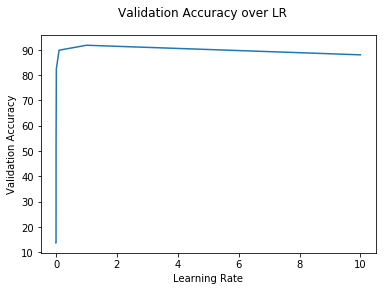

Test Accuracy: 90.9
Run Time for Training: 5.516980886459351


In [21]:
## Start your code here
#Note: You don't have to use the starter code
def main():
    ##Parameter(Learning Rate) Tuning
    #Define Parameters and Variables
    lrs = np.power(10,np.arange(-10,2),dtype=float)
    W = np.random.randn(10,785)
    all_valid_acc = []
    best_acc = 0
    best_lr = 0
    best_lr_test = 0
    run_time = 0
    
    for i in range(lrs.shape[0]):
        print('Evaluating Learning Rate:', lrs[i])
        start_time= time.time()
        Weights = sgd(epochs, lrs[i], W, train_set[0], y_train, batch)
        end_time = time.time()
        valid_acc = test_accuracy(valid_set[0], y_val, Weights)
        print('Learning Rate:', lrs[i], 'Validation Accuracy:', valid_acc)
        all_valid_acc.append(valid_acc)
        if(valid_acc > best_acc):
            best_acc = valid_acc
            best_lr_test = test_accuracy(test_set[0], y_test, Weights)
            best_lr = lrs[i]
            run_time = end_time-start_time   
        
    print('Best Learning Rate:', best_lr)
    ##Plot learning rate against validation accuracy
    fig = plt.figure()
    fig.suptitle("Validation Accuracy over LR")
    plt.plot(lrs, all_valid_acc)
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Accuracy')
    plt.show()
    ##test accuracy and run time
    print('Test Accuracy:', best_lr_test)
    print('Run Time for Training:', run_time)
    pass

if __name__ == '__main__':
    main()

Result Report: 
- Parameters you chose(batch_size,learning rate,epoch): batch_size = 100, learning rate was a loop through an array, and epoch = 20
- Best Learning Rate: 0.01
- Test Accuracy: 91.23
- Run Time for Training(Using the parameters you chose finally for testing): 4.558103084564209

# 7 Comparison

Comparing the Accuracy and Run Times, we have:
- Keras: Test Accuracy: 92.19%, Run Time: 17.71 seconds
- Theano: Accuracy: 97.86%, Run Time: 2.13 seconds
- Numpy: Accuracy: 91.23%, Run Time: 4.56 seconds

With Keras, the winning factor (pro) is ease of implementation. It took relatively little time to look at the website, read a few tutorials, and implement it. On the other hand (con), it has a high run time, and it's test-accuracy wasn't as high as I would have hoped. A factor which is both a pro and con, is that you don't really need to understand what's happening at all, in terms of the model – you just add a layer, and trust Keras to do it for you, without appreciating the complexity of what's happening behind the scenes. That is a pro if you just want to implement it quickly, but a con in terms of understanding the depths of what you are doing. 

With Theano, the level of difficulty stepped up quite a bit, but its performance certainly was impressive. It was not intuitive to implement, even knowing the algorithm – figuring out how to use the symbolic references, and debugging/understanding errors wasn't trivial. On the other hand, it clearly outperformed Keras and Numpy, both in Run Time, and in accuracy. In Theano, you had to understand the algorithm a bit, and implement much of it – it just spared you from figuring out the gradients, and made it a bit higher level. That again is a pro and con, depending on what you are looking for – if you want to just implement it, then that's a con, but if you want to understand precisely what you're doing at what stage, it's mostly a pro (even though you aren't fully implementing the gradient updates). 